In [2]:
## install pandas via jupyter (first run only!)
#!pip3 install --upgrade pip setuptools wheel
#!pip3 install pandas
#!pip3 install seaborn

import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

INPUT_FILE = os.path.join("input", "ks-projects-201801.csv")
REPORT_FILE = os.path.join("output","profile.html")
GENERATE_REPORT = False

raw_data = pd.read_csv(INPUT_FILE)
raw_data.head()

# creating a copy of the original data to ensure integrity of input data
data = raw_data.copy()
#data.head()


In [3]:
df = pd.DataFrame(data, columns=['main_category', 'goal'])
df1 = pd.DataFrame(data, columns=['main_category', 'pledged', 'goal'])

df['percent'] = (df['goal'] / df['goal'].sum()) * 100
#df
df1['percent'] = (df1['pledged'] / df1['goal']) * 100

percentage = df1.sort_values(['main_category', 'percent'], ascending=False).groupby('main_category').head(5)
percentage

,main_category,pledged,goal,percent
92271,Theater,1155.00,1.00,115500.0
74545,Theater,1100.00,1.00,110000.0
347517,Theater,100.00,1.00,10000.0
73831,Theater,451.00,5.00,9020.0
302609,Theater,65.00,1.00,6500.0
...,...,...,...,...
285408,Art,27588.23,1.00,2758823.0
304489,Art,100.00,0.01,1000000.0
11384,Art,834.00,1.00,83400.0
33356,Art,796.00,1.00,79600.0


In [4]:
#average goal
#df.mean()

In [155]:
#calculating the amount of successful campaigns

def success_total():
    def success (campaign):
        if campaign["state"] == 'successful':
            return "Yes"
        else:
            return "No"

    data['successful'] = data.apply(success, axis=1)
    print(data['successful'].value_counts(sort= False, normalize=True).round(3) * 100)

success_total()



No     64.6
Yes    35.4
Name: successful, dtype: float64


<AxesSubplot:title={'center':'Success rate (in percent)'}, xlabel='Category'>

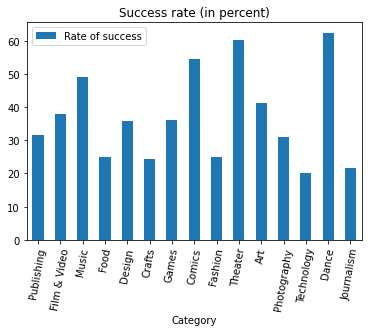

In [390]:
list_success_rate = []
def success_rate():
    d_state_clean = data[(data['state'] != 'live') & (data['state'] != 'undefined') & (data['state'] != 'suspended')]
    d_cat_count = d_state_clean['main_category'].value_counts(sort= False, normalize=True).round(4) * 100
    main_categories = pd.unique(d_state_clean['main_category'])
    

    for i in main_categories:
        state_count_mc = d_state_clean[d_state_clean['main_category'] == i]
        camp_success_true = len(state_count_mc[state_count_mc['state'] == 'successful']) # Amount of successful campaigns
        camp_success_false = len(state_count_mc[state_count_mc['state'] != 'successful']) # Amount of unsuccessful campaigns
        camp_succ_percent = ((camp_success_true / (camp_success_true + camp_success_false)) * 100) # Calculation of percentage of successful campaigns
        list_success_rate.append(camp_succ_percent)

success_rate()

df_cat_success_percentage = pd.DataFrame(columns=[])
df_cat_success_percentage['Category'] = main_categories
df_cat_success_percentage['Rate of success'] = list_success_rate
df_cat_success_percentage.plot.bar(x='Category', y='Rate of success', rot=80, title='Success rate (in percent)')




/var/folders/c0/k61szpwj19x_sfrwsl820gmw0000gn/T/ipykernel_18825/2459485888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_state_total['tf'] = d_state_total.apply(success, axis=1)
/var/folders/c0/k61szpwj19x_sfrwsl820gmw0000gn/T/ipykernel_18825/2459485888.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_state_total.loc[is_successful, 'ft'] = 'successful'


<AxesSubplot:>

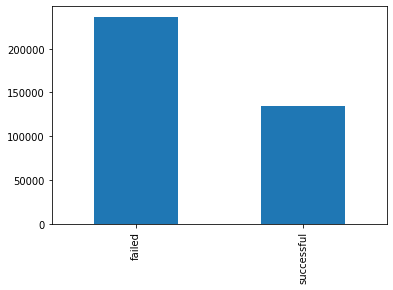

In [391]:
d_state_total = data[(data['state'] != 'live') & (data['state'] != 'undefined') & (data['state'] != 'suspended')]

def success (campain_success):
    if campain_success['state'] == 'successful':
        return 'successful'
    else:
        return 'failed'

d_state_total['tf'] = d_state_total.apply(success, axis=1)
is_successful = d_state_total['state'] == 'successful'
is_failed = d_state_total['state'] == 'failed'
d_state_total.loc[is_successful, 'ft'] = 'successful'
d_state_total.loc[is_failed, 'ft'] = 'failed'
pd.crosstab(d_state_total['tf'], d_state_total['ft']) # Prints out crosstab for verification
d_state_total['tf'].value_counts().plot.bar() # Prints amount of successful v unsuccessful campaigns

In [392]:
# Dropping all data of unsucessful or running campaigns and anonymising data to avoid bias

invest_clean = data.drop(data[data.state != 'successful'].index)
invest = invest_clean.drop(['deadline', 'name', 'ID', 'currency', 'launched', 'state', 'goal', 'pledged', 'usd pledged', 'category', 'successful'], axis=1)

# Average sum pledged in USD per project (example: Design)
invest_sum_design = invest.loc[(invest['main_category'] == 'Design'), 'usd_pledged_real'].sum()
print(invest_sum_design / (len(invest[invest['main_category'] == 'Design'])))

# Generalised approach of previous average per project
for i in enumerate(invest):
    invest_sum_i = invest.loc[(invest['main_category'] == i), 'usd_pledged_real'].sum()
    invest_average_i = invest_sum_i / (len(invest[invest['main_category'] == i]))
    
else:
    print(i, invest_average_i)

highest = invest.sort_values("usd_pledged_real", ascending=False)
print(highest.head(n=10))


#pd.crosstab(data["main_category"], data["usd_pledged_real"], normalize="index").plot.bar()


62858.52414691943
(4, 'usd_goal_real') nan
       main_category  backers country  usd_pledged_real  usd_goal_real
157270        Design    78471      US       20338986.27       500000.0
250254        Design    62642      US       13285226.36        50000.0
216629        Design    66673      US       12779843.49      1000000.0
289915         Games    19264      US       12393139.69       100000.0
282416        Design    68929      US       10266845.74       100000.0
293861        Design    44949      US        9192055.66        20000.0
187652         Games   219382      US        8782571.99        10000.0
6665           Games    63416      US        8596474.58       950000.0
309630         Games    43733      US        7072757.00        40000.0
271276        Design    26359      US        6565782.50       500000.0


/var/folders/c0/k61szpwj19x_sfrwsl820gmw0000gn/T/ipykernel_18825/1512758176.py:13: RuntimeWarning: invalid value encountered in double_scalars
  invest_average_i = invest_sum_i / (len(invest[invest['main_category'] == i]))


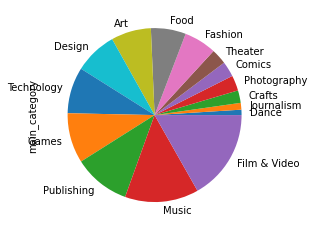

In [393]:
# Pie chart for percentage of categories
def cat_percentage():
    df_mc = pd.DataFrame(data, columns=['main_category'])
    df_mc_len = len(df_mc)
    df_mc_perc = df_mc['main_category'].value_counts(sort=True, ascending=True) / df_mc_len
    df_mc_perc.plot.pie()

cat_percentage()


<AxesSubplot:title={'center':'Total revenue of each category (in billions)'}, xlabel='Category'>

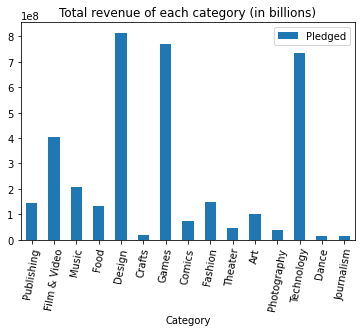

In [394]:
# Pie chart for percentage of revenue

df_mc_revenue = pd.DataFrame(data, columns=['main_category','pledged'])
main_categories = pd.unique(df_mc_revenue['main_category'])
df_rev = pd.DataFrame(columns=['category'])
list_pledged=[]

def revenue():
    for i in main_categories:
        df_revenue_total = df_mc_revenue['pledged'].sum
        df_mc_revenue_acc = df_mc_revenue.loc[df_mc_revenue['main_category'] == i, 'pledged'].sum()
        list_pledged.append(df_mc_revenue_acc)
revenue()

enumerated_cat = pd.unique(df_mc_revenue['main_category'])

df_rev = pd.DataFrame(columns=[])
df_rev['Category'] = pd.unique(df_mc_revenue['main_category'])
df_rev['Pledged'] = list_pledged
df_rev.plot.bar(x="Category", y="Pledged", rot=80, title="Total revenue of each category (in billions)")



In [395]:
df2 = pd.DataFrame(data, columns=['main_category', 'goal', 'pledged'])

#list theater values
#theater = df2.loc[df2['main_category'] == 'Theater']

categories = pd.unique(df2['main_category'])

# list amount of projects of each unique main_category
pd.value_counts(df2['main_category']) 
sum_total = df2['goal'].sum()

for i in categories:
    df_i = df[df['main_category']==i]
    #shows total funding for each category
    #print (i, df_i['goal'].sum()) 
    df3 = (df_i['goal'].sum() / sum_total) * 100
    df4 = (i, df3.round(2))
    df5 = df3.round(0)
    #print (df4)
    print(df_i.head())

    #df6 = pd.DataFrame(i, df5)
    #df6.columns =['Main Category', 'Percentage']
    #print(df6)



   main_category     goal   percent
0     Publishing   1000.0  0.000005
10    Publishing   2500.0  0.000013
17    Publishing   3000.0  0.000016
40    Publishing   3000.0  0.000016
56    Publishing  13500.0  0.000073
   main_category     goal   percent
1   Film & Video  30000.0  0.000161
2   Film & Video  45000.0  0.000242
4   Film & Video  19500.0  0.000105
9   Film & Video  65000.0  0.000350
27  Film & Video  17757.0  0.000096
   main_category     goal   percent
3          Music   5000.0  0.000027
11         Music  12500.0  0.000067
18         Music    250.0  0.000001
25         Music  10000.0  0.000054
34         Music  12000.0  0.000065
   main_category     goal   percent
5           Food  50000.0  0.000269
6           Food   1000.0  0.000005
7           Food  25000.0  0.000135
19          Food   5000.0  0.000027
23          Food    500.0  0.000003
   main_category      goal   percent
8         Design  125000.0  0.000673
15        Design    2500.0  0.000013
31        Design    1000.

In [396]:

 for i in [f.__name__ for f in globals().values() if type(f) == type(lambda *args: None)]:
     print(i)




success
revenue
cat_percentage
success_rate
success_total
